In [2]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:

df_poet = pd.read_csv("experiments/with_poet/poet.log", delimiter=" ",
                      skipinitialspace=True).groupby("HB_NUM").first()
df_heartbeats = pd.read_csv(
    "experiments/with_poet/heartbeat.log", delimiter=" ", skipinitialspace=True, index_col="Beat")
df_poet

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,LOWER_ID,UPPER_ID,NUM_HBS
HB_NUM,,,,,,,,,,,,,
490000,260.341431,0.200000,19.106391,1.000010,13.625156,0.073390,0.000054,9.943590,-70.341431,0.052339,10,11,28
990000,176.226959,19.106391,18.570824,0.000064,9.943590,0.038924,0.000039,10.685240,13.773041,0.053848,10,11,21
1490000,277.929504,18.570824,21.244910,0.000049,10.685240,0.033638,0.000031,6.546389,-87.929504,0.047070,9,10,37
1990000,187.068268,21.244910,22.351403,0.000041,6.546389,0.023056,0.000035,6.677555,2.931732,0.044740,9,10,33
2490000,188.597565,22.351403,23.340099,0.000045,6.677555,0.025129,0.000038,6.737642,1.402435,0.042845,9,10,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452390000,190.613632,30.167415,30.201666,0.000055,6.278801,0.028580,0.000046,6.258483,-0.613632,0.033111,9,10,45
452890000,190.566544,30.201666,30.245900,0.000056,6.258483,0.028540,0.000046,6.239752,-0.566544,0.033062,9,10,46
453390000,189.604340,30.245900,30.270924,0.000056,6.239752,0.028520,0.000046,6.252822,0.395660,0.033035,9,10,46


In [4]:
df_hb_mean = df_heartbeats.groupby("Tag").mean()
df_hb_mean

,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
Tag,,,,,,,,,,
0,1.637338e+18,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000
10000,1.637338e+18,525.589508,262.794739,262.794754,1.0,1.0,1.0,21.637581,21.637581,21.637581
20000,1.637338e+18,399.505625,266.337097,269.976215,1.0,1.0,1.0,19.149480,19.149480,16.593387
30000,1.637338e+18,353.011924,264.758942,261.658112,1.0,1.0,1.0,20.016362,20.016362,21.719667
40000,1.637338e+18,327.359224,261.887390,253.634648,1.0,1.0,1.0,21.227200,21.227200,24.707086
...,...,...,...,...,...,...,...,...,...,...
454450000,1.637338e+18,401.620797,185.764664,182.178299,1.0,1.0,1.0,11.671527,10.454932,10.807941
454460000,1.637338e+18,401.615758,185.603333,181.749679,1.0,1.0,1.0,11.671475,10.439734,9.362593
454470000,1.637338e+18,401.610605,185.354568,179.529797,1.0,1.0,1.0,11.671457,10.466695,10.935714


In [5]:

df = df_poet.join(df_hb_mean)
df["Timestamp"] = pd.to_datetime(df["Timestamp"] -df["Timestamp"].iloc[0])
df = df.iloc[5:]
df

,HB_RATE,X_HAT_MINUS,X_HAT,P_MINUS,H,K,P,SPEEDUP,ERROR,WORKLOAD,...,Timestamp,Global_Rate,Window_Rate,Instant_Rate,Global_Accuracy,Window_Accuracy,Instant_Accuracy,Global_Power,Window_Power,Instant_Power
HB_NUM,,,,,,,,,,,,,,,,,,,,,
2990000,192.448685,23.340099,24.268699,0.000048,6.737642,0.026387,0.000039,6.636743,-2.448685,0.041205,...,1970-01-01 00:00:01.255833088,207.749397,192.448685,238.080443,1.0,1.0,1.0,13.186245,10.525007,10.767676
3490000,189.124298,24.268699,25.021266,0.000049,6.636743,0.026821,0.000040,6.671741,0.875702,0.039966,...,1970-01-01 00:00:01.520209664,204.867188,189.124298,236.111954,1.0,1.0,1.0,12.753468,10.389601,10.563358
3990000,189.411575,25.021266,25.638681,0.000050,6.671741,0.027470,0.000041,6.694692,0.588425,0.039004,...,1970-01-01 00:00:01.784185088,202.798689,189.411575,237.280800,1.0,1.0,1.0,12.456387,10.533706,10.717028
4490000,191.078064,25.638681,26.180284,0.000051,6.694692,0.027867,0.000042,6.653513,-1.078064,0.038197,...,1970-01-01 00:00:02.045858048,201.425873,191.078064,235.960526,1.0,1.0,1.0,12.226606,10.494599,10.729406
4990000,192.454163,26.180284,26.690918,0.000052,6.653513,0.027960,0.000042,6.561566,-2.454163,0.037466,...,1970-01-01 00:00:02.305660416,200.491235,192.454163,237.517900,1.0,1.0,1.0,12.045089,10.484194,10.742234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452390000,190.613632,30.167415,30.201666,0.000055,6.278801,0.028580,0.000046,6.258483,-0.613632,0.033111,...,1970-01-01 00:03:58.762937088,402.596930,190.613632,200.924050,1.0,1.0,1.0,11.677961,10.154038,12.140796
452890000,190.566544,30.201666,30.245900,0.000056,6.258483,0.028540,0.000046,6.239752,-0.566544,0.033062,...,1970-01-01 00:03:59.025312768,402.364369,190.566544,235.338694,1.0,1.0,1.0,11.676315,10.176885,12.956268
453390000,189.604340,30.245900,30.270924,0.000056,6.239752,0.028520,0.000046,6.252822,0.395660,0.033035,...,1970-01-01 00:03:59.289019904,402.130083,189.604340,202.160244,1.0,1.0,1.0,11.674648,10.162533,12.449932


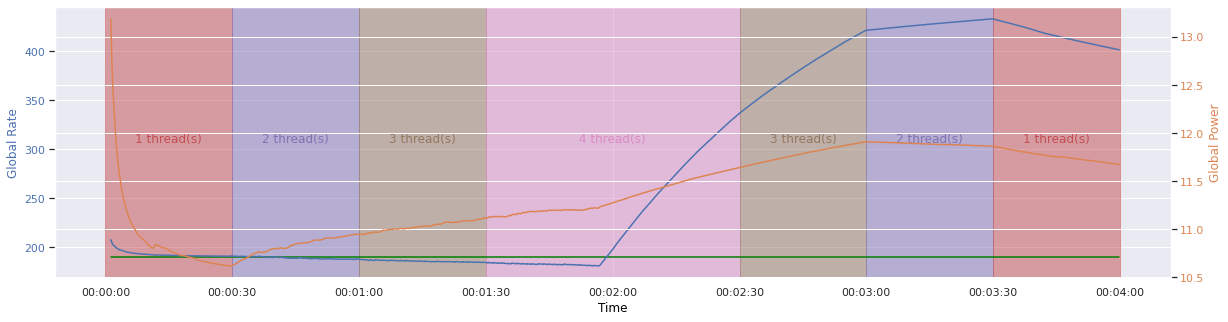

In [10]:
fig, ax1 = plt.subplots(figsize=(20, 5))

areas = [
    [1, [0, 30]],
    [2, [30, 60]],
    [3, [60, 90]],
    [4, [90, 150]],
    [3, [150, 180]],
    [2, [180, 210]],
    [1, [210, 240]],
]

for cores, a in areas:
    x_min = pd.Timestamp(0)+pd.Timedelta(a[0], unit="sec")
    x_max = pd.Timestamp(0)+pd.Timedelta(a[1], unit="sec")
    ax1.axvspan(x_min, x_max,
                color=f"C{int(cores)+2}", alpha=0.5)
    y = (df["Global_Rate"].max()+df["Global_Rate"].min())/2
    ax1.text(pd.Timestamp(0)+pd.Timedelta((a[0]+a[1])/2, unit="sec"),
             y, f"{cores} thread(s)",
             color=f"C{int(cores)+2}", horizontalalignment="center")

ax1.plot([df["Timestamp"].min(),df["Timestamp"].max()],[190,190],color="green")

ax1.plot(df["Timestamp"], df["Global_Rate"], label="Global_Rate", color="C0")
ax1.tick_params(axis='y', labelcolor="C0")
ax1.set_ylabel('Global Rate', color="C0")
ax1.set_xlabel('Time', color="black")

ax2 = ax1.twinx()
ax2.plot(df["Timestamp"], df["Global_Power"], label="Global_Power", color="C1")
ax2.tick_params(axis='y', labelcolor="C1")
ax2.set_ylabel('Global Power', color="C1")

fig.savefig("figures/benchmark.png",dpi=300)


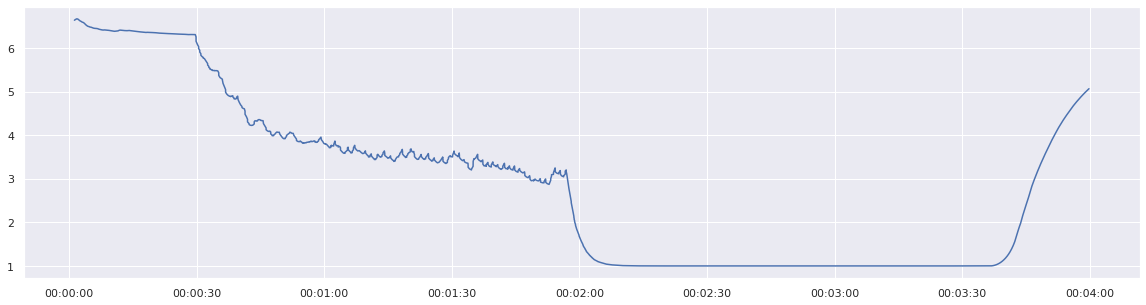

In [11]:
fig, ax1 = plt.subplots(figsize=(20, 5)) 
plt.plot(df["Timestamp"], df["SPEEDUP"].ewm(span=100).mean(), label="SPEEDUP")